In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

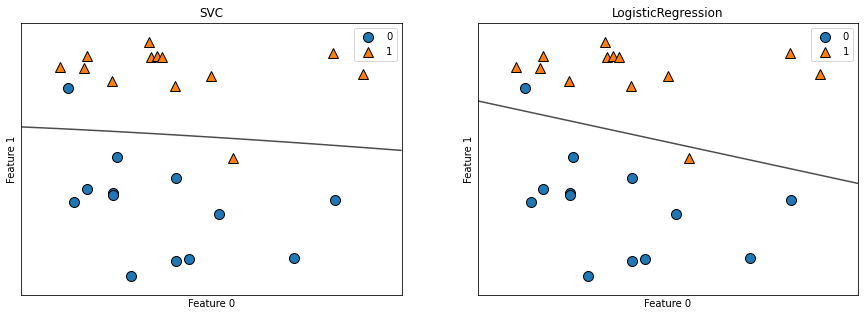

In [7]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
for model,ax in zip([SVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend ()
axes[1].legend ()

Training Score C=1: 0.9507042253521126
Testing Score C=1: 0.951048951048951
Training Score C=0.01: 0.9366197183098591
Testing Score C=0.01: 0.9300699300699301
Training Score C=100: 0.9460093896713615
Testing Score C=100: 0.958041958041958


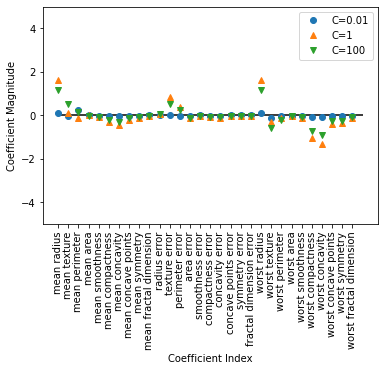

In [11]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg1=LogisticRegression(C=1).fit(X_train,y_train)
print("Training Score C=1: {}".format(logreg1.score(X_train,y_train)))
print("Testing Score C=1: {}".format(logreg1.score(X_test,y_test)))

logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training Score C=0.01: {}".format(logreg001.score(X_train,y_train)))
print("Testing Score C=0.01: {}".format(logreg001.score(X_test,y_test)))

logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print("Training Score C=100: {}".format(logreg100.score(X_train,y_train)))
print("Testing Score C=100: {}".format(logreg100.score(X_test,y_test)))

plt.plot(logreg001.coef_.T,'o',label='C=0.01',lw=0)
plt.plot(logreg1.coef_.T,'^',label='C=1',lw=0)
plt.plot(logreg100.coef_.T,'v',label='C=100',lw=0)
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1],colors='black')
plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()
plt.show()

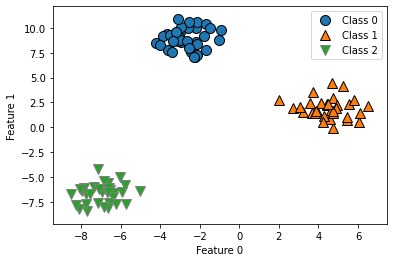

In [12]:
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])
plt.show()

In [13]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
print("Coefficient shape: ",linear_svm.coef_.shape)
print("Intercept shape: ",linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


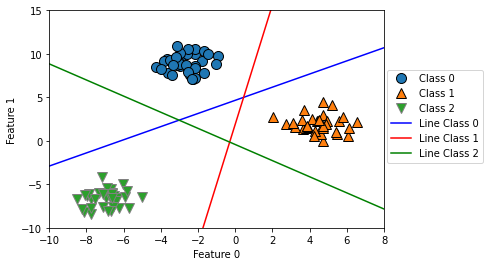

In [14]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line Class 0','Line Class 1','Line Class 2'],loc=(1.01,0.3))
plt.show()

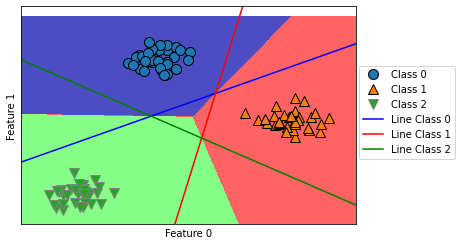

In [15]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line Class 0','Line Class 1','Line Class 2'],loc=(1.01,0.3))
plt.show()